In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
coin = make_array('heads', 'tails')
np.random.choice(coin)

'heads'

In [5]:
np.random.choice(coin, 42)

array(['heads', 'tails', 'tails', 'heads', 'tails', 'tails', 'tails',
       'tails', 'heads', 'heads', 'heads', 'tails', 'tails', 'tails',
       'heads', 'tails', 'heads', 'tails', 'tails', 'heads', 'heads',
       'tails', 'heads', 'tails', 'heads', 'heads', 'heads', 'heads',
       'heads', 'tails', 'tails', 'heads', 'tails', 'heads', 'tails',
       'tails', 'tails', 'tails', 'tails', 'heads', 'tails', 'tails'],
      dtype='<U5')

In [6]:
1 < 2

True

In [7]:
2 == 3

False

In [8]:
np.random.choice(coin, 42) == 'heads'

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False], dtype=bool)

In [11]:
True + False + True

2

In [17]:
np.count_nonzero(np.random.choice(coin, 42) == 'heads')

21

# Conditionals

In [18]:
def sign(x):
    if x < 0:
        return 'Negative'

In [19]:
sign(-42)

'Negative'

In [20]:
sign(42)

In [1]:
def sign(x):
    if x < 0:
        return 'Negative'
    elif x > 0:
        return 'Non-negative'

In [2]:
sign(42)

'Non-negative'

In [21]:
def sign(x):
    if x < 0:
        return 'Negative'
    elif x > 0:
        return 'Positive'
    else: # the only other option is x == 0
        return 'Neither'

In [22]:
sign(42)

'Positive'

In [23]:
sign(0)

'Neither'

In [24]:
roulette = Table.read_table('data/roulette_wheel.csv')
roulette

Pocket,Color
0,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


In [25]:
np.random.choice(roulette.column(1))

'red'

In [57]:
def one_bet_on_red(amt):
    color = np.random.choice(roulette.column(1))
    if color == 'red':
        return amt
    else:
        return amt * -1

In [58]:
one_bet_on_red(1), one_bet_on_red(1), one_bet_on_red(1), one_bet_on_red(1)

(1, -1, 1, -1)

In [59]:
np.random.choice(np.arange(1, 7)) # die roll

5

# Loops

In [35]:
for person in make_array('Lawton', 'Lonzo', 'Bill'):
    print(person)

Lawton
Lonzo
Bill


In [36]:
person = make_array('Lawton', 'Lonzo', 'Bill').item(0)
print(person)
person = make_array('Lawton', 'Lonzo', 'Bill').item(1)
print(person)
person = make_array('Lawton', 'Lonzo', 'Bill').item(2)
print(person)

Lawton
Lonzo
Bill


# Simulation

In [60]:
for i in np.arange(10):
    print(one_bet_on_red(1))

-1
-1
-1
-1
1
-1
-1
-1
1
-1


In [63]:
winnings = 0
for i in np.arange(100):
    winnings += one_bet_on_red(1)

winnings

-14

In [65]:
a = make_array(1, 2, 3)
a

array([1, 2, 3])

In [66]:
np.append(a, 4)

array([1, 2, 3, 4])

In [67]:
a

array([1, 2, 3])

In [68]:
a = np.append(a, 4)
a = np.append(a, 5)
a

array([1, 2, 3, 4, 5])

In [69]:
winnings = make_array()
for i in np.arange(100):
    winnings = np.append(winnings, one_bet_on_red(1))

winnings

array([-1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.])

In [70]:
np.average(winnings), sum(winnings)

(-0.080000000000000002, -8.0)

In [71]:
outcomes = Table().with_column('winnings', winnings)
outcomes

winnings
-1
1
1
1
1
-1
-1
1
-1
1


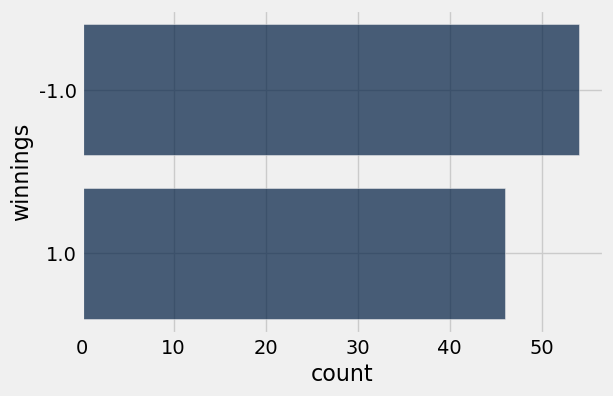

In [76]:
outcomes.group('winnings').barh('winnings')

In [77]:
coin

array(['heads', 'tails'],
      dtype='<U5')

In [82]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'heads')
num_heads

49

In [86]:
def flip_100_coins_and_count_heads():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'heads')

In [87]:
flip_100_coins_and_count_heads()

50

In [88]:
num_repetitions = 20000

head_counts = make_array()

for i in np.arange(num_repetitions):
    head_count = flip_100_coins_and_count_heads()
    head_counts = np.append(head_counts, head_count)

In [89]:
len(head_counts)

20000

In [90]:
head_counts

array([ 54.,  56.,  44., ...,  52.,  46.,  47.])

In [91]:
results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions+1),
    'Number of heads', head_counts
)
results

Repetition,Number of heads
1,54
2,56
3,44
4,40
5,40
6,58
7,46
8,53
9,56
10,52


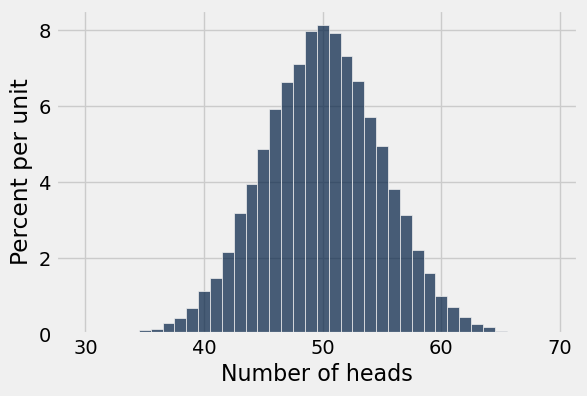

In [97]:
results.hist('Number of heads', bins=np.arange(29.5, 70.6, 1))

# Monty Hall

In [105]:
def monty_hall_game():
    '''returns a list: 
    [original guess, what monty reveals, what you could switch to]'''

    doors = make_array('goat 1', 'goat 2', 'car')

    guess = np.random.choice(doors)

    if guess == 'goat 1':
        return ['goat 1', 'goat 2', 'car']
    elif guess == 'goat 2':
        return ['goat 2', 'goat 1', 'car']
    else:
        goats = make_array('goat 1', 'goat 2')
        np.random.shuffle(goats)
        return ['car', goats.item(0), goats.item(1)]

In [106]:
monty_hall_game()

['goat 2', 'goat 1', 'car']

In [107]:
games = Table(['Guess', 'Revealed', 'Remaining']) # Table with column labels but no rows

for i in np.arange(10000):
    games.append(monty_hall_game()) # add a row to a table in-place

games

Guess,Revealed,Remaining
car,goat 1,goat 2
car,goat 2,goat 1
car,goat 1,goat 2
car,goat 1,goat 2
goat 1,goat 2,car
goat 1,goat 2,car
car,goat 2,goat 1
goat 1,goat 2,car
car,goat 2,goat 1
goat 1,goat 2,car


In [108]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3257
goat 1,3351
goat 2,3392


In [109]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6743
goat 1,1646
goat 2,1611


In [113]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
joined = joined.relabel(0, 'Item').relabel(1, 'Original door').relabel(2, 'Door you could switch to')
joined

Item,Original door,Door you could switch to
car,3257,6743
goat 1,3351,1646
goat 2,3392,1611


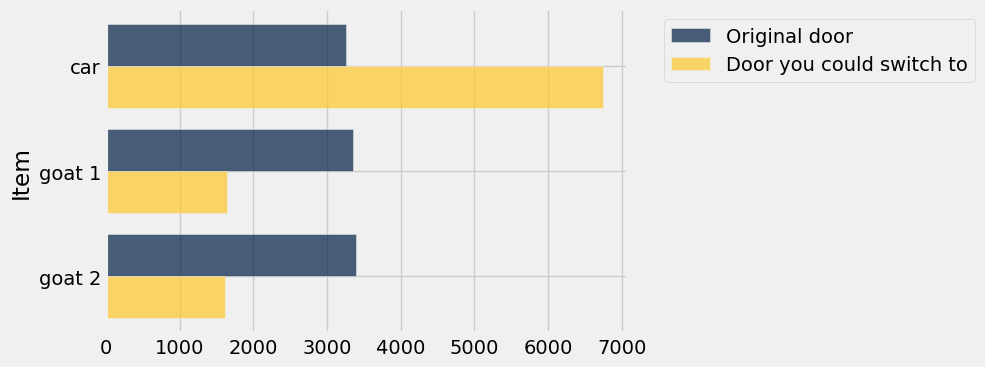

In [114]:
joined.barh(0)

# Probabilities

In [127]:
rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


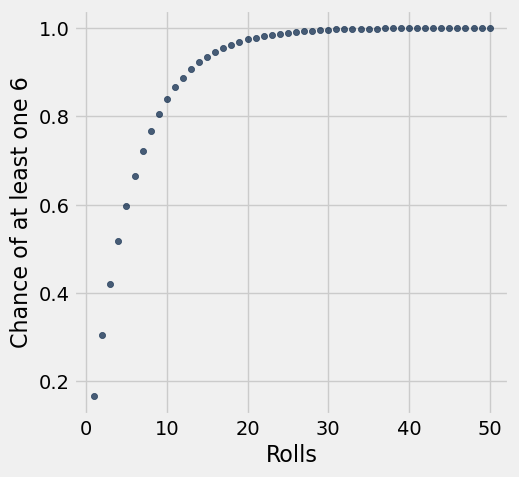

In [125]:
results.scatter('Rolls')

In [128]:
results.where('Rolls', 50)

Rolls,Chance of at least one 6
50,0.99989
